In [54]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

In [55]:
filename = 'log1.csv'
data = []
with open(filename, encoding='utf8', newline='') as f:
    csvreader = csv.reader(f)
    for row in csvreader:
        data.append(row[0:2])

data

[['14.614847', '51.078053'],
 ['14.614847', '51.154346'],
 ['14.617808', '51.245899'],
 ['14.627937', '51.247425'],
 ['14.616398', '51.284046'],
 ['14.617949', '51.276417'],
 ['14.610204', '51.259632'],
 ['14.606260', '51.248951'],
 ['14.613445', '51.235218'],
 ['14.613585', '51.212330'],
 ['14.640467', '51.192493'],
 ['14.703237', '51.601433'],
 ['14.696622', '52.498661'],
 ['14.692959', '53.066299'],
 ['14.699574', '53.557640'],
 ['14.706050', '53.870453'],
 ['14.695772', '54.004730'],
 ['14.698024', '53.936066'],
 ['14.700556', '53.707176'],
 ['14.705489', '53.440147'],
 ['14.707312', '53.165482'],
 ['14.690006', '52.925915'],
 ['14.693380', '52.715343'],
 ['14.689586', '52.518497'],
 ['14.690146', '52.373539'],
 ['14.696342', '52.243839'],
 ['14.700985', '52.104980'],
 ['14.691128', '52.033264'],
 ['14.684793', '51.946289'],
 ['14.685082', '51.882202'],
 ['14.686344', '51.836426'],
 ['14.682971', '51.819641'],
 ['14.683111', '51.773865'],
 ['14.682121', '51.761658'],
 ['14.678186',

In [61]:
temperature_filtered = 0
humidity_filtered = 0
initialized = False
is_entered = False
alpha_temp = 0.01
alpha_humid = 0.01
temp_threshold = 2.0
humid_threshold = 10.0
humidity_enter_possibility = 0
temperature_enter_possibility = 0

for i,d in enumerate(data):
    temperature = float(d[0])
    humidity = float(d[1])

    if (initialized):
        humidity_filtered = humidity * alpha_humid + (1 - alpha_humid) * humidity_filtered
        temperature_filtered = temperature * alpha_temp + (1 - alpha_temp) * temperature_filtered
    else:
        humidity_filtered = humidity
        temperature_filtered = temperature
        initialized = True
    
    if (not is_entered):
        if (humidity > 90):
            humidity_enter_possibility = 100
        elif (humidity - humidity_filtered > humid_threshold):
            humidity_enter_possibility = 100
            print(i, "humidity over threshold. possibility")
        else:
            if (humidity_enter_possibility > 0):
                humidity_enter_possibility = humidity_enter_possibility - 1
                if (humidity_enter_possibility == 0) :
                    print(i, "humidity_enter_possibility = 0")
        
        if (temperature - temperature_filtered > temp_threshold):
            temperature_enter_possibility = 100
            print(i, "temperature over threshold. possibility")
        else:
            if (temperature_enter_possibility > 0):
                temperature_enter_possibility = temperature_enter_possibility - 1
                if (temperature_enter_possibility == 0):
                    print(i, "temperature_enter_possibility = 0")

        if (humidity_enter_possibility > 0 and temperature_enter_possibility > 0):
            is_entered = True;
            print(i,"bath entered")

186 humidity over threshold. possibility
187 humidity over threshold. possibility
188 humidity over threshold. possibility
189 humidity over threshold. possibility
190 humidity over threshold. possibility
191 humidity over threshold. possibility
192 humidity over threshold. possibility
193 humidity over threshold. possibility
194 humidity over threshold. possibility
195 humidity over threshold. possibility
196 humidity over threshold. possibility
197 humidity over threshold. possibility
198 humidity over threshold. possibility
199 humidity over threshold. possibility
200 humidity over threshold. possibility
201 humidity over threshold. possibility
202 humidity over threshold. possibility
203 humidity over threshold. possibility
204 humidity over threshold. possibility
205 humidity over threshold. possibility
226 temperature over threshold. possibility
226 bath entered


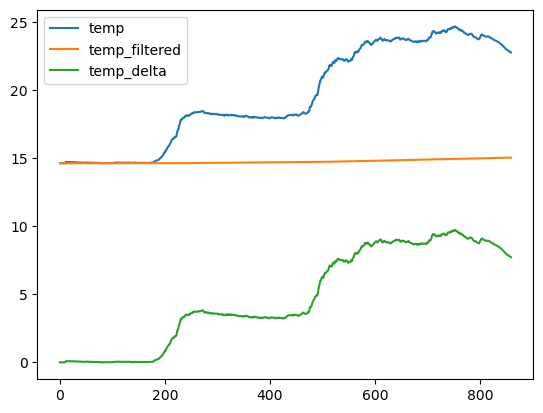

In [66]:
# digital low pass filter
data_filtered = []
alpha = 0.0001
for i in range(len(data)):
    if i == 0:
        data_filtered.append(data[i])
    else:
        data_filtered.append([alpha * float(data[i][0]) + (1 - alpha) * float(data_filtered[i-1][0]), alpha * float(data[i][1]) + (1 - alpha) * float(data_filtered[i-1][1])])
data = np.array(data, dtype=float)
data_filtered = np.array(data_filtered, dtype=float)
data_delta = data - data_filtered

plt.plot([float(x[0]) for x in data], label='temp')
plt.plot([float(x[0]) for x in data_filtered], label='temp_filtered')
plt.plot([float(x[0]) for x in data_delta], label='temp_delta')
plt.legend()
plt.show()

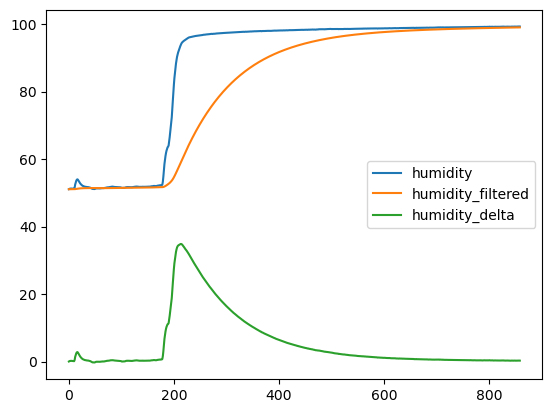

In [53]:
# digital low pass filter
data_filtered = []
alpha = 0.01
for i in range(len(data)):
    if i == 0:
        data_filtered.append(data[i])
    else:
        data_filtered.append([alpha * float(data[i][0]) + (1 - alpha) * float(data_filtered[i-1][0]), alpha * float(data[i][1]) + (1 - alpha) * float(data_filtered[i-1][1])])
data = np.array(data, dtype=float)
data_filtered = np.array(data_filtered, dtype=float)
data_delta = data - data_filtered

plt.plot([float(x[1]) for x in data], label='humidity')
plt.plot([float(x[1]) for x in data_filtered], label='humidity_filtered')
plt.plot([float(x[1]) for x in data_delta], label='humidity_delta')
plt.legend()
plt.show()

In [31]:
filename = 'data_tokyo.csv'
data_tokyo = []
with open(filename, encoding='utf8', newline='') as f:
    csvreader = csv.reader(f)
    for row in csvreader:
        data_tokyo.append([row[1], row[4]])

data_tokyo

[['14.6', '83'],
 ['13.5', '81'],
 ['13.0', '72'],
 ['12.0', '52'],
 ['11.4', '52'],
 ['12.5', '36'],
 ['13.1', '29'],
 ['14.4', '30'],
 ['16.0', '30'],
 ['17.7', '25'],
 ['18.3', '16'],
 ['20.3', '27'],
 ['18.8', '22'],
 ['20.2', '28'],
 ['20.4', '30'],
 ['19.1', '39'],
 ['17.7', '46'],
 ['16.5', '50'],
 ['15.9', '53'],
 ['15.8', '54'],
 ['15.8', '61'],
 ['15.9', '65'],
 ['16.0', '69'],
 ['16.3', '70'],
 ['15.8', '73'],
 ['15.3', '72'],
 ['15.2', '75'],
 ['14.0', '79'],
 ['14.4', '80'],
 ['13.2', '72'],
 ['15.5', '64'],
 ['17.7', '61'],
 ['19.8', '54'],
 ['21.9', '48'],
 ['20.6', '47'],
 ['21.1', '43'],
 ['21.6', '45'],
 ['20.8', '49'],
 ['22.3', '50'],
 ['21.2', '50'],
 ['19.9', '58'],
 ['19.0', '67'],
 ['18.7', '60'],
 ['18.3', '59'],
 ['18.1', '53'],
 ['17.2', '57'],
 ['17.8', '54'],
 ['17.4', '56'],
 ['17.4', '58'],
 ['17.6', '56'],
 ['17.5', '56'],
 ['16.3', '65'],
 ['15.1', '79'],
 ['13.8', '95'],
 ['13.5', '98'],
 ['13.1', '99'],
 ['13.3', '100'],
 ['14.0', '100'],
 ['14.0', '9

In [35]:
alpha_minute = 1/math.log(0.01)

1.4426950408889634